In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'cleaned_bird_strikes_data.csv')

In [3]:
# Get basic statistics of numerical columns
df.describe()


,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured,Year
count,25429.000000,25429.000000,2.542900e+04,25429.000000,25429.000000,25429.000000
mean,253800.148767,2.699634,5.566368e+03,799.028432,0.000826,2006.502772
std,38472.800499,12.825804,1.222388e+05,1740.079843,0.047339,3.362241
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000,2000.000000
25%,225742.000000,1.000000,0.000000e+00,0.000000,0.000000,2004.000000
50%,248609.000000,1.000000,0.000000e+00,50.000000,0.000000,2007.000000
75%,269044.000000,1.000000,0.000000e+00,700.000000,0.000000,2009.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000,2011.000000


In [4]:
# Get the distribution of categorical columns
df['Aircraft: Type'].value_counts()

Aircraft: Type
Airplane    25429
Name: count, dtype: int64

In [5]:
df['Effect: Impact to flight'].value_counts()

Effect: Impact to flight
Unknown                  23351
Precautionary Landing     1121
Aborted Take-off           479
Other                      390
Engine Shut Down            88
Name: count, dtype: int64

In [6]:
# Check missing data again to ensure that all missing values have been handled
df.isnull().sum()


Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above

In [7]:
df.dtypes


Record ID                                    int64
Aircraft: Type                              object
Airport: Name                               object
Aircraft: Make/Model                        object
Wildlife: Number struck                     object
Wildlife: Number Struck Actual               int64
Effect: Impact to flight                    object
FlightDate                                  object
Effect: Indicated Damage                    object
Aircraft: Number of engines?                object
Aircraft: Airline/Operator                  object
Origin State                                object
When: Phase of flight                       object
Conditions: Precipitation                   object
Remains of wildlife collected?                bool
Remains of wildlife sent to Smithsonian       bool
Remarks                                     object
Wildlife: Size                              object
Conditions: Sky                             object
Wildlife: Species              

Bird Strikes by Aircraft Type

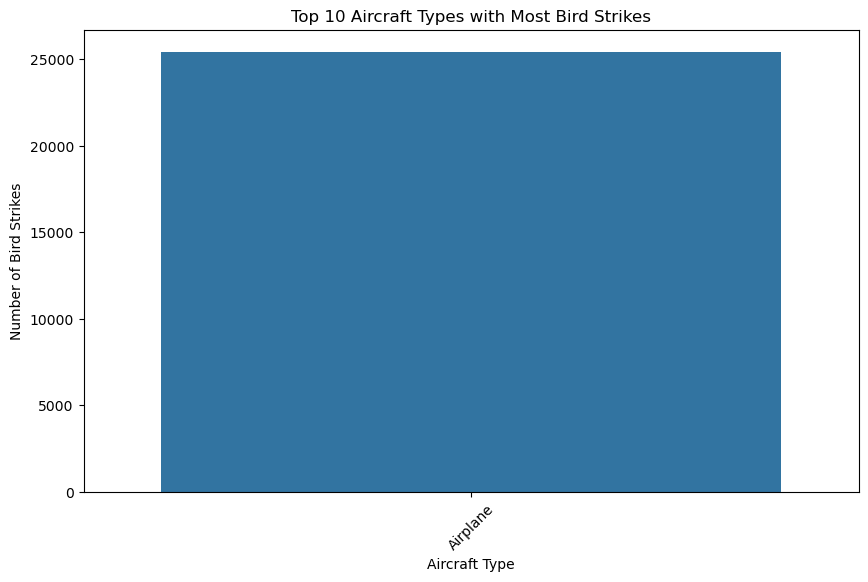

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'Aircraft: Type' and counting the occurrences of bird strikes
aircraft_strikes = df['Aircraft: Type'].value_counts().head(10)

# Plotting the top 10 aircraft types
plt.figure(figsize=(10, 6))
sns.barplot(x=aircraft_strikes.index, y=aircraft_strikes.values)
plt.title('Top 10 Aircraft Types with Most Bird Strikes')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


Bird Strikes Over Time (Yearly)

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


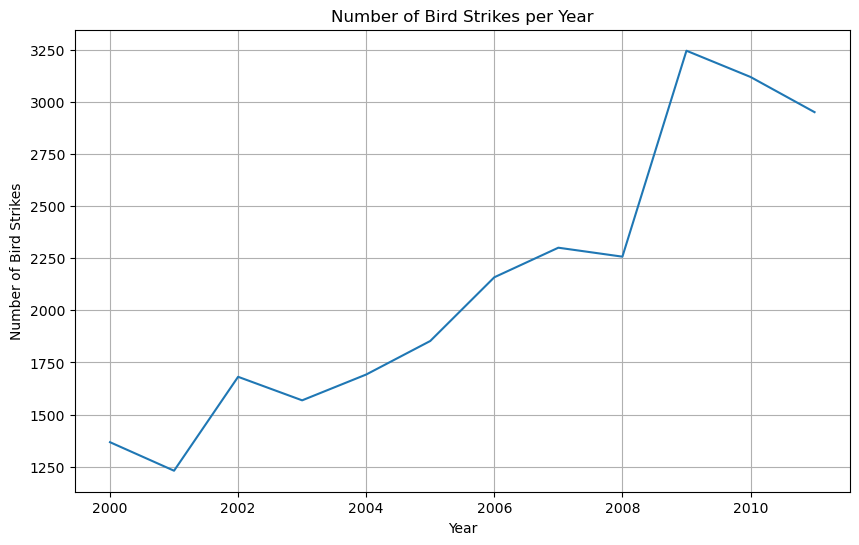

In [9]:
# Grouping the data by 'Year' and counting the bird strikes per year
bird_strikes_per_year = df.groupby('Year').size()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=bird_strikes_per_year.index, y=bird_strikes_per_year.values)
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()


 Top Airports for Bird Strikes

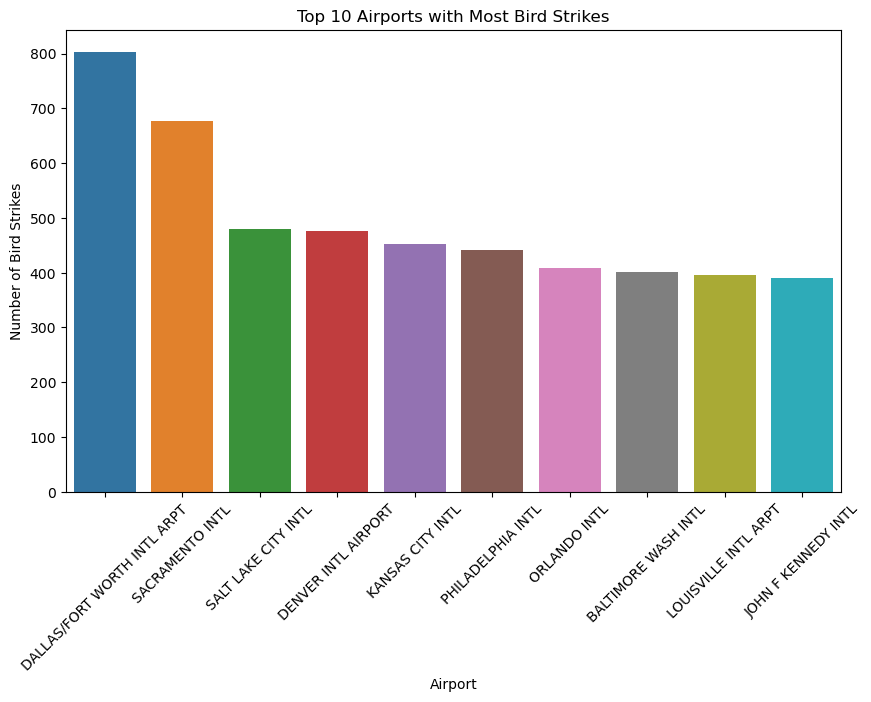

In [10]:
# Counting occurrences of bird strikes by airport
top_airports = df['Airport: Name'].value_counts().head(10)

# Plotting the top 10 airports
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title('Top 10 Airports with Most Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


Impact of Bird Strikes by Flight Phase

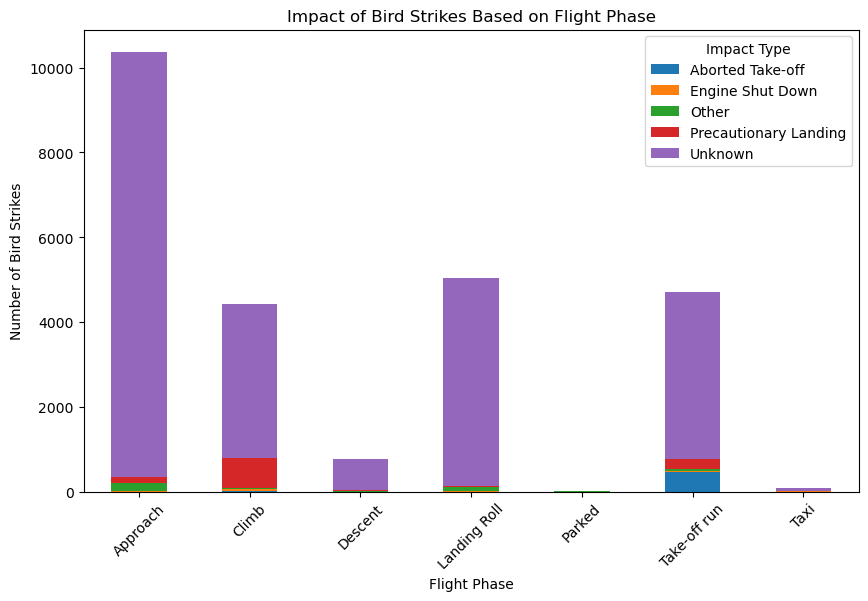

In [11]:
# Grouping data by 'When: Phase of flight' and 'Effect: Impact to flight'
phase_impact = df.groupby(['When: Phase of flight', 'Effect: Impact to flight']).size().unstack()

# Plotting the effect of bird strikes by flight phase
phase_impact.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Impact of Bird Strikes Based on Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Impact Type')
plt.xticks(rotation=45)
plt.show()


Cost Analysis of Bird Strikes

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


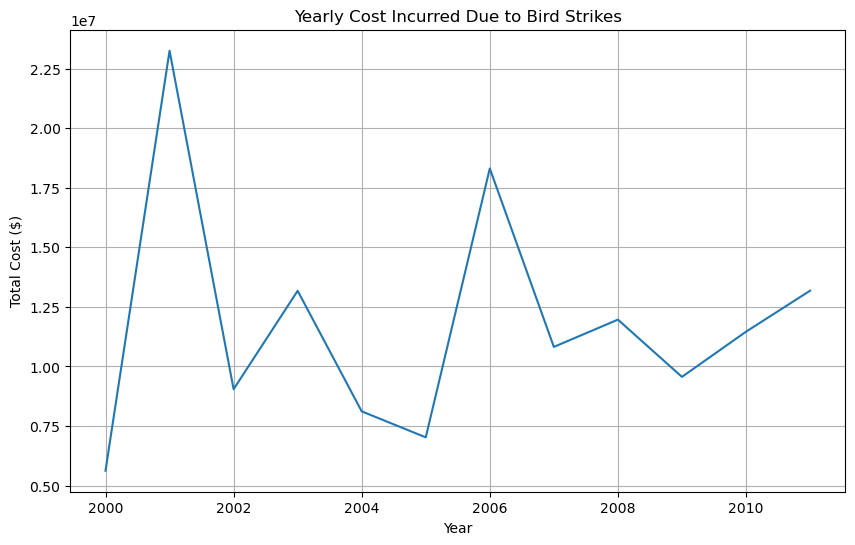

In [12]:
# Grouping by 'Year' and summing the total cost of bird strikes
cost_per_year = df.groupby('Year')['Cost: Total $'].sum()

# Plotting the cost trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=cost_per_year.index, y=cost_per_year.values)
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()


Most Frequent Bird Species Involved in Strikes

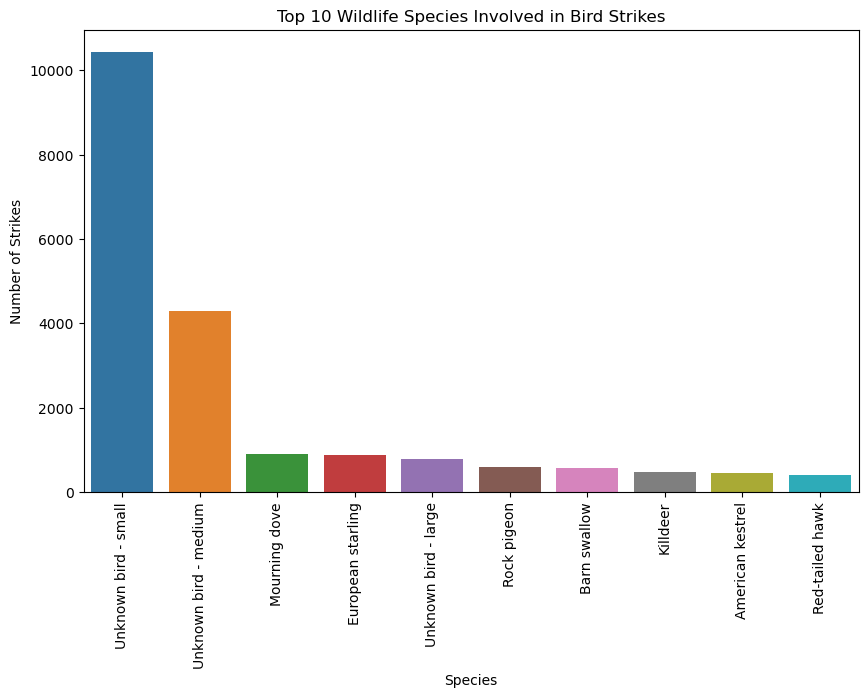

In [15]:
# Counting the number of bird species involved in strikes
top_species = df['Wildlife: Species'].value_counts().head(10)

# Plotting the top species
plt.figure(figsize=(10, 6))
sns.barplot(x=top_species.index, y=top_species.values)
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Species')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=90)
plt.show()
